# Análisis semántico de letras de canciones de Shakira

## Recolección de datos

In [1]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
from bs4 import BeautifulSoup

GENIUS_API_TOKEN = "-VZ923ZrVOueVzSj6AwnW0gJeXu2LlOvTeI7w7bQPnUo7vT7H9l8E4BE89pTkIhJ"
HEADERS = {'Authorization': f'Bearer {GENIUS_API_TOKEN}'}
SEARCH_URL = "https://api.genius.com/search"

def buscar_canciones(artista, max_resultados=5):
    resultados = []
    page = 1
    while len(resultados) < max_resultados:
        params = {'q': artista, 'page': page}
        respuesta = requests.get(SEARCH_URL, params=params, headers=HEADERS).json()
        hits = respuesta['response']['hits']
        if not hits:
            break
        for hit in hits:
            if artista.lower() in hit['result']['primary_artist']['name'].lower():
                resultados.append(hit['result'])
                if len(resultados) >= max_resultados:
                    break
        page += 1
    return resultados

def obtener_letra(url):
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    letras = soup.find_all("div", class_="Lyrics__Container-sc-3d1d18a3-1")
    if not letras:
        letras = soup.find_all("div", class_="lyrics")
    return "\n".join([div.get_text(separator=" ") for div in letras]) if letras else ""

# Uso:
canciones = buscar_canciones("Shakira", 10)
letras = [obtener_letra(c['url']) for c in canciones]


In [4]:
print(canciones)

[{'annotation_count': 9, 'api_path': '/songs/128053', 'artist_names': 'Shakira (Ft. Wyclef Jean)', 'full_title': "Hips Don't Lie by\xa0Shakira (Ft.\xa0Wyclef\xa0Jean)", 'header_image_thumbnail_url': 'https://images.genius.com/9f9d3864d411c5eecd5bdbe507f8c338.300x300x1.png', 'header_image_url': 'https://images.genius.com/9f9d3864d411c5eecd5bdbe507f8c338.1000x1000x1.png', 'id': 128053, 'lyrics_owner_id': 19602, 'lyrics_state': 'complete', 'path': '/Shakira-hips-dont-lie-lyrics', 'primary_artist_names': 'Shakira', 'pyongs_count': 83, 'relationships_index_url': 'https://genius.com/Shakira-hips-dont-lie-sample', 'release_date_components': {'year': 2006, 'month': 2, 'day': 28}, 'release_date_for_display': 'February 28, 2006', 'release_date_with_abbreviated_month_for_display': 'Feb. 28, 2006', 'song_art_image_thumbnail_url': 'https://images.genius.com/9f9d3864d411c5eecd5bdbe507f8c338.300x300x1.png', 'song_art_image_url': 'https://images.genius.com/9f9d3864d411c5eecd5bdbe507f8c338.1000x1000x1.

In [54]:
for c in canciones:
    print(c.keys())
    break

dict_keys(['annotation_count', 'api_path', 'artist_names', 'full_title', 'header_image_thumbnail_url', 'header_image_url', 'id', 'lyrics_owner_id', 'lyrics_state', 'path', 'primary_artist_names', 'pyongs_count', 'relationships_index_url', 'release_date_components', 'release_date_for_display', 'release_date_with_abbreviated_month_for_display', 'song_art_image_thumbnail_url', 'song_art_image_url', 'stats', 'title', 'title_with_featured', 'url', 'featured_artists', 'primary_artist', 'primary_artists'])


In [55]:
# Imprimir los años de las canciones
anios_canciones = []
for cancion in canciones:
    anios_canciones.append(cancion['release_date_components']['year'])

print("Años de las canciones:")
n = 0
for anio in anios_canciones:
    print(f"CANCION {n}: {anio}")

Años de las canciones:
CANCION 0: 2006
CANCION 0: 2010
CANCION 0: 2009
CANCION 0: 2016
CANCION 0: 2014
CANCION 0: 2001
CANCION 0: 2016
CANCION 0: 2014
CANCION 0: 2017
CANCION 0: 2010


In [5]:
# Imprimir los titulos de las canciones
for cancion in canciones:
    print(f"Título: {cancion['full_title']}")
    print(f"Título: {cancion['url']}")

Título: Hips Don't Lie by Shakira (Ft. Wyclef Jean)
Título: https://genius.com/Shakira-hips-dont-lie-lyrics
Título: Waka Waka (This Time for Africa) by Shakira (Ft. Freshlyground)
Título: https://genius.com/Shakira-waka-waka-this-time-for-africa-lyrics
Título: She Wolf by Shakira
Título: https://genius.com/Shakira-she-wolf-lyrics
Título: Chantaje by Shakira (Ft. Maluma)
Título: https://genius.com/Shakira-chantaje-lyrics
Título: Can't Remember to Forget You by Shakira (Ft. Rihanna)
Título: https://genius.com/Shakira-cant-remember-to-forget-you-lyrics
Título: Whenever, Wherever by Shakira
Título: https://genius.com/Shakira-whenever-wherever-lyrics
Título: Try Everything by Shakira
Título: https://genius.com/Shakira-try-everything-lyrics
Título: La La La (Brazil 2014) by Shakira (Ft. Carlinhos Brown)
Título: https://genius.com/Shakira-la-la-la-brazil-2014-lyrics
Título: Me Enamoré by Shakira
Título: https://genius.com/Shakira-me-enamore-lyrics
Título: Loca (English Version) by Shakira (Ft

In [6]:
n=0
for letra in letras:
    print(f"{n} Letras: {letra}")
    n += 1

0 Letras: 137 Contributors Translations Português Deutsch Hips Don’t Lie Lyrics “Hips Don’t Lie” is a hit song off of Shakira’s Oral Fixation Vol. 2.

This song is based on “Dance Like This” by Wyclef Jean/Claudette Ortiz, and it samples the trumpets from Jerry Rivera’s “Amores Como El…  Read More   [Intro: Wyclef Jean] Ladies up in here tonight No fightin'  (We got the refugees up in here) No fightin' No fightin' Shakira, Shakira [Pre-Chorus: Wyclef Jean &  Shakira ] I never really knew that she could dance like this (Hey) She make a man wanna speak Spanish ¿Cómo se llama? (¡Sí!), ¿bonita? (¡Sí!) Mi casa (Shakira, Shakira), su casa Oh, baby, when you talk like that  (Huh-uh; yeah) You make a woman go mad  (Oh) So be wise  (¡Sí!),  and keep on  (¡Sí!) Reading the signs of my body  (Uno, dos, tres, cuatro) No fightin' [Chorus: Shakira  &  Wyclef Jean ] I'm on tonight You know my hips don't lie ( No fighting ) And I'm starting to feel it's right All the attraction, the tension Don't you 

In [7]:
# Contar cuantos elementos hay en la lista de letras
print(f"Total de letras encontradas: {len(letras)}")

Total de letras encontradas: 10


In [8]:
m = 0
for letra in letras:
    print(f"\nLETRA {m}:")
    print(letra)
    m += 1


LETRA 0:
137 Contributors Translations Português Deutsch Hips Don’t Lie Lyrics “Hips Don’t Lie” is a hit song off of Shakira’s Oral Fixation Vol. 2.

This song is based on “Dance Like This” by Wyclef Jean/Claudette Ortiz, and it samples the trumpets from Jerry Rivera’s “Amores Como El…  Read More   [Intro: Wyclef Jean] Ladies up in here tonight No fightin'  (We got the refugees up in here) No fightin' No fightin' Shakira, Shakira [Pre-Chorus: Wyclef Jean &  Shakira ] I never really knew that she could dance like this (Hey) She make a man wanna speak Spanish ¿Cómo se llama? (¡Sí!), ¿bonita? (¡Sí!) Mi casa (Shakira, Shakira), su casa Oh, baby, when you talk like that  (Huh-uh; yeah) You make a woman go mad  (Oh) So be wise  (¡Sí!),  and keep on  (¡Sí!) Reading the signs of my body  (Uno, dos, tres, cuatro) No fightin' [Chorus: Shakira  &  Wyclef Jean ] I'm on tonight You know my hips don't lie ( No fighting ) And I'm starting to feel it's right All the attraction, the tension Don't you 

In [9]:
# Eliminar un fragmento de la letra
def eliminar_fragmento(letra, fragmento):
    return letra.replace(fragmento, "").strip()

In [10]:
# CANCIÓN 0
fragmento_a_eliminar1 = "137 Contributors Translations Português Deutsch Hips Don’t Lie Lyrics “Hips Don’t Lie” is a hit song off of Shakira’s Oral Fixation Vol. 2."
fragmento_a_eliminar2 = "This song is based on “Dance Like This” by Wyclef Jean/Claudette Ortiz, and it samples the trumpets from Jerry Rivera’s “Amores Como El…  Read More" 
fragmento_a_eliminar3 = "[Pre-Chorus: Wyclef Jean &  Shakira ]"
fragmento_a_eliminar4 = "[Verse 1: Wyclef Jean]"
fragmento_a_eliminar5 = "[Pre-Chorus: Wyclef Jean &  Shakira ]"
fragmento_a_eliminar6 = "[Verse 2: Shakira &  Wyclef Jean ]"
fragmento_a_eliminar7 = "[Bridge: Wyclef Jean  with Shakira ]"
fragmento_a_eliminar8 = "[Pre-Chorus: Wyclef Jean &  Shakira ]"
fragmento_a_eliminar9 = "[Refrain: Wyclef Jean &  Shakira ]"
fragmento_a_eliminar10 = "[Verse 3: Wyclef Jean  with Shakira ]"
fragmento_a_eliminar11 = "[Chorus: Shakira &  Wyclef Jean ]"
fragmento_a_eliminar12 = "[Outro: Wyclef Jean &  Shakira ]"
fragmento_a_eliminar13 = "[Intro: Wyclef Jean]"
fragmento_a_eliminar14 = "[Chorus: Shakira  &  Wyclef Jean ]"


# CANCIÓN 1
fragmento_a_eliminar21 = "93 Contributors Translations Português Deutsch English Waka Waka (This Time for Africa) Lyrics Waka Waka (This Time For Africa) is a song by Colombian singer Shakira, featuring the South African Freshlyground. It was the 2010 FIFA World Cup official song, leading to some controversy because it wasn’t…"
fragmento_a_eliminar22 = "Read More"
fragmento_a_eliminar23 = "[Intro]"
fragmento_a_eliminar24 = "[Verse 1: Shakira]"
fragmento_a_eliminar25 = "[Pre-Chorus: Shakira]"
fragmento_a_eliminar26 = "[Chorus: Shakira]"
fragmento_a_eliminar27 = "[Instrumental Break] [Verse 2: Shakira]"
fragmento_a_eliminar28 = "[Pre-Chorus: Shakira]"
fragmento_a_eliminar29 = "[Verse 3: Zolani]"
fragmento_a_eliminar30 = "[Bridge]"
fragmento_a_eliminar31 = "[Post-Chorus: Shakira]"
fragmento_a_eliminar32 = "[Outro: Shakira]"

# CANCIÓN 2
fragmento_a_eliminar41 = "46 Contributors Translations Español 한국어 (Korean) She Wolf Lyrics “She Wolf” is a song by Shakira, taken from her eighth studio album of the same name (2009). It was released on 10 July 2009, as the lead single from the album."
fragmento_a_eliminar42 = "[Intro]"
fragmento_a_eliminar43 = "[Chorus]"
fragmento_a_eliminar44 = "[Verse 2]"
fragmento_a_eliminar45 = "[Pre-Chorus 2]"
fragmento_a_eliminar46 = "[Bridge]"
fragmento_a_eliminar47 = "[Outro]"
fragmento_a_eliminar51 = "Upon its release,"
fragmento_a_eliminar52 = "She Wolf"
fragmento_a_eliminar53 = "was met with…"
fragmento_a_eliminar54 = "Read More"
fragmento_a_eliminar55 = "[Verse 1]"
fragmento_a_eliminar56 = "[Pre-Chorus 1]"

# CANCIÓN 3
fragmento_a_eliminar62 ="[Pre-Coro: Shakira &  Maluma ]"
fragmento_a_eliminar63 ="[Coro: Shakira,  Maluma  &  Ambos ]"
fragmento_a_eliminar64 ="[Verso 2: Maluma &  Shakira ]"
fragmento_a_eliminar65 ="[Puente: Shakira &  Maluma ]"
fragmento_a_eliminar66 ="[Post-Coro: Shakira &  Ambos ]"
fragmento_a_eliminar67 ="[Outro: Shakira &  Maluma ]"
fragmento_a_eliminar72 = "72 Contributors Translations Français English Deutsch Chantaje Lyrics Shakira released the lead single from her eleventh album El Dorado on October 28, 2016, after a series of clues posted on her instagram account. The song features reggaeton artist Maluma,"
fragmento_a_eliminar73 = "who is also from…"
fragmento_a_eliminar74 = "Read More"
fragmento_a_eliminar75 = "[Letra de"
fragmento_a_eliminar76 = "Chantaje"
fragmento_a_eliminar77 = "ft. Maluma] [Intro] ( Rudeboyz ) [Verso 1: Maluma]"

# CANCIÓN 4
fragmento_a_eliminar81 = "68 Contributors Translations Ελληνικά Türkçe Español 한국어 (Korean) Can’t Remember to Forget You Lyrics [Verse 1: Shakira]"
fragmento_a_eliminar82 = "[Pre-Chorus: Shakira]"
fragmento_a_eliminar83 = "[Chorus: Shakira]"
fragmento_a_eliminar84 = "[Post-Chorus: Shakira]"
fragmento_a_eliminar85 = "[Verse 2: Rihanna]"
fragmento_a_eliminar86 = "[Pre-Chorus: Rihanna,  Shakira ,   Both ]"
fragmento_a_eliminar87 = "[Chorus: Shakira,  Rihanna ]"
fragmento_a_eliminar88 = "[Bridge: Shakira,  Rihanna ]"

# CANCIÓN 5
fragmento_a_eliminar91 = "67 Contributors Translations Ελληνικά Español Deutsch Whenever, Wherever Lyrics “Whenever, Wherever” is a song by Colombian singer-songwriter Shakira for her third studio album and English-language debut, Laundry Service."
fragmento_a_eliminar92 = "[Pre-Chorus]"
fragmento_a_eliminar93 = "[Chorus]"
fragmento_a_eliminar94 = "[Verse 2]"
fragmento_a_eliminar95 = "[Bridge]"
fragmento_a_eliminar96 = "It was released on 27 August 2001 by Epic Records as the lead…"
fragmento_a_eliminar97 = "Read More"
fragmento_a_eliminar98 = "[Verse 1]"

# CANCIÓN 6
fragmento_a_eliminar141 = '93 Contributors Try Everything Lyrics “Try Everything” by Shakira is the official theme song from Disney’s animated film, Zootopia.'
fragmento_a_eliminar142 = '[Pre-Chorus]'
fragmento_a_eliminar143 = '[Chorus]'
fragmento_a_eliminar144 = '[Refrain]'
fragmento_a_eliminar145 = '[Verse 2]'
fragmento_a_eliminar146 = '[Outro]'
fragmento_a_eliminar147 = 'Shakira does the voice for a character named Gazelle, who is a pop star from the city of Zootopia, and also holds…'
fragmento_a_eliminar148 = 'Read More'
fragmento_a_eliminar149 = '[Verse 1]' 

# CANCIÓN 7
fragmento_a_eliminar161 = '34 Contributors Translations Deutsch La La La (Brazil 2014) Lyrics “La La La” is the repurposed version of Dare (La La La) for the 2014 World Cup in Brazil. Instead of being a love song, it’s an anthem proclaiming Brazil’s greatness, and calling the players to score.'
fragmento_a_eliminar162 = '[Chorus: Shakira]'
fragmento_a_eliminar163 = '[Post-Chorus: Shakira]'
fragmento_a_eliminar164 = '[Verse 1: Shakira]'
fragmento_a_eliminar165 = '[Pre-Chorus: Shakira]'
fragmento_a_eliminar166 = '[Verse 2: Shakira]'
fragmento_a_eliminar167 = '[Build: Shakira &  Carlinhos Brown ]'
fragmento_a_eliminar168 = 'Read More'
fragmento_a_eliminar169 = '[Letra de "La La La (Brazil 2014)" ft. Carlinhos Brown] [Intro: Carlinhos Brown]'
fragmento_a_eliminar170 = 'This…'

# CANCIÓN 8
fragmento_a_eliminar181 = '36 Contributors Translations English Me Enamoré Lyrics “Me Enamoré” (translated to: “I fell in love”) is a very personal song that entails what it was like when Shakira met her husband, Gerard Piqué, for the first time. It has an upbeat tempo which corresponds to…'
fragmento_a_eliminar182 = '[Coro]'
fragmento_a_eliminar183 = '[Verso 2]'
fragmento_a_eliminar184 = '[Post-Coro]'
fragmento_a_eliminar185 = '[Post-Chorus: Shakira]'
fragmento_a_eliminar186 = 'Read More'
fragmento_a_eliminar187 = '[Letra de "Me Enamoré"] [Verso 1]'
fragmento_a_eliminar188 = '[Pre-Coro]'

# CANCIÓN 9
fragmento_a_eliminar201 = "22 Contributors Loca (English Version) Lyrics [Intro: Shakira]"
fragmento_a_eliminar202 = "[Verse 1: Shakira]"
fragmento_a_eliminar203 = "[Chorus: Shakira]"
fragmento_a_eliminar204 = "[Verse 2: Dizzee Rascal,  Shakira ]"
fragmento_a_eliminar205 = "[Chorus: Shakira,  El Cata ]"
fragmento_a_eliminar206 = "[Outro: Shakira]"
fragmento_a_eliminar207 = "[Refrain: Shakira]"
fragmento_a_eliminar208 = "[Verse 3: Shakira,  Dizzee Rascal  &  El Cata ]"
fragmento_a_eliminar209 = "[Post-Chorus: Shakira &"
fragmento_a_eliminar210 = "Dizzee Rascal ]"
fragmento_a_eliminar211 = "[Refrain: Shakira]"

In [11]:
# ELIMINAR FRAGMENTOS DE LA CANCIÓN 0
letra_modificada1 = eliminar_fragmento(letras[0], fragmento_a_eliminar1)
letra_modificada1 = eliminar_fragmento(letra_modificada1, fragmento_a_eliminar2)
letra_modificada1 = eliminar_fragmento(letra_modificada1, fragmento_a_eliminar3)
letra_modificada1 = eliminar_fragmento(letra_modificada1, fragmento_a_eliminar4)
letra_modificada1 = eliminar_fragmento(letra_modificada1, fragmento_a_eliminar5)
letra_modificada1 = eliminar_fragmento(letra_modificada1, fragmento_a_eliminar6)
letra_modificada1 = eliminar_fragmento(letra_modificada1, fragmento_a_eliminar7)
letra_modificada1 = eliminar_fragmento(letra_modificada1, fragmento_a_eliminar8)
letra_modificada1 = eliminar_fragmento(letra_modificada1, fragmento_a_eliminar9)
letra_modificada1 = eliminar_fragmento(letra_modificada1, fragmento_a_eliminar10)
letra_modificada1 = eliminar_fragmento(letra_modificada1, fragmento_a_eliminar11)
letra_modificada1 = eliminar_fragmento(letra_modificada1, fragmento_a_eliminar12)
letra_modificada1 = eliminar_fragmento(letra_modificada1, fragmento_a_eliminar13)
letra_modificada1 = eliminar_fragmento(letra_modificada1, fragmento_a_eliminar14)

# NUEVO FRAGMENTO DE CANCIÓN 0
print(f"Letras modificadas: {letra_modificada1}")

Letras modificadas: Ladies up in here tonight No fightin'  (We got the refugees up in here) No fightin' No fightin' Shakira, Shakira  I never really knew that she could dance like this (Hey) She make a man wanna speak Spanish ¿Cómo se llama? (¡Sí!), ¿bonita? (¡Sí!) Mi casa (Shakira, Shakira), su casa Oh, baby, when you talk like that  (Huh-uh; yeah) You make a woman go mad  (Oh) So be wise  (¡Sí!),  and keep on  (¡Sí!) Reading the signs of my body  (Uno, dos, tres, cuatro) No fightin'  I'm on tonight You know my hips don't lie ( No fighting ) And I'm starting to feel it's right All the attraction, the tension Don't you see, baby? This is perfection  Hey, girl, I can see your body moving And it's driving me crazy (Huh-uh) And I didn't have the slightest idea Until I saw you dancin' (Yeah) And when you walk up on the dance floor, nobody cannot ignore The way you move your body, girl (Just smooth) And everything's so unexpected, the way you right and left it So you can keep on shakin' it 

In [12]:
# ELIMINAR FRAGMENTOS DE LA CANCIÓN 1
letra_modificada2 = eliminar_fragmento(letras[1], fragmento_a_eliminar21)
letra_modificada2 = eliminar_fragmento(letra_modificada2, fragmento_a_eliminar22)
letra_modificada2 = eliminar_fragmento(letra_modificada2, fragmento_a_eliminar23)
letra_modificada2 = eliminar_fragmento(letra_modificada2, fragmento_a_eliminar24)
letra_modificada2 = eliminar_fragmento(letra_modificada2, fragmento_a_eliminar25)
letra_modificada2 = eliminar_fragmento(letra_modificada2, fragmento_a_eliminar26)
letra_modificada2 = eliminar_fragmento(letra_modificada2, fragmento_a_eliminar27)
letra_modificada2 = eliminar_fragmento(letra_modificada2, fragmento_a_eliminar28)
letra_modificada2 = eliminar_fragmento(letra_modificada2, fragmento_a_eliminar29)
letra_modificada2 = eliminar_fragmento(letra_modificada2, fragmento_a_eliminar30)
letra_modificada2 = eliminar_fragmento(letra_modificada2, fragmento_a_eliminar31)
letra_modificada2 = eliminar_fragmento(letra_modificada2, fragmento_a_eliminar32)

# NUEVO FRAGMENTO DE CANCIÓN 1
print(f"Letras modificadas: {letra_modificada2}")

Letras modificadas: Ohh-ehh Uh,  zangalewa   (Otra, otra) Uh, zangalewa  (Otra, otra) Uh, zangalewa  (Otra, otra) Uh, zangalewa  (Otra, otra)  You're a good soldier, choosing your battles Pick yourself up and dust yourself off, get back in the saddle You're on the front line, everyone's watching You know it's serious, we're getting closer, this isn't over  The pressure's on, you feel it But you got it all, believe it When you fall get up, oh-oh And if you fall get up, eh-eh Zamina-mina, zangalewa? 'Cause this is Africa  Zamina-mina, hé-hé Waka, waka, hé-hé Zamina-mina, zangalewa? This time for Africa

 Listen to your God,  this is our motto Your time to shine, don't wait in line y vamos por todo People are raising their expectations Go on and feed 'em, this is your moment, no hesitations  Today's your day, I feel it You paved the way, believe it If you get down, get up, oh-oh When you get down, get up, eh-eh Zamina-mina, zangalewa? This time for Africa  Zamina-mina, hé-hé Waka, waka, h

In [13]:
# ELIMINAR FRAGMENTOS DE LA CANCIÓN 2
letra_modificada3 = eliminar_fragmento(letras[2], fragmento_a_eliminar41)
letra_modificada3 = eliminar_fragmento(letra_modificada3, fragmento_a_eliminar42)
letra_modificada3 = eliminar_fragmento(letra_modificada3, fragmento_a_eliminar43)
letra_modificada3 = eliminar_fragmento(letra_modificada3, fragmento_a_eliminar44)
letra_modificada3 = eliminar_fragmento(letra_modificada3, fragmento_a_eliminar45)
letra_modificada3 = eliminar_fragmento(letra_modificada3, fragmento_a_eliminar46)
letra_modificada3 = eliminar_fragmento(letra_modificada3, fragmento_a_eliminar47)
letra_modificada3 = eliminar_fragmento(letra_modificada3, fragmento_a_eliminar51)
letra_modificada3 = eliminar_fragmento(letra_modificada3, fragmento_a_eliminar52)
letra_modificada3 = eliminar_fragmento(letra_modificada3, fragmento_a_eliminar53)
letra_modificada3 = eliminar_fragmento(letra_modificada3, fragmento_a_eliminar54)
letra_modificada3 = eliminar_fragmento(letra_modificada3, fragmento_a_eliminar55)
letra_modificada3 = eliminar_fragmento(letra_modificada3, fragmento_a_eliminar56)

# NUEVO FRAGMENTO DE CANCIÓN 2
print(f"Letras modificadas: {letra_modificada3}")

Letras modificadas: “”       S.O.S., she's in disguise S.O.S., she's in disguise There's a she wolf in disguise Coming out, coming out, coming out  A domesticated girl, that's all you ask of me Darling, it is no joke, this is lycanthropy The moon's awake now, with eyes wide open My body's craving, so feed the hungry  I've been devoting myself to you Monday to Monday and Friday to Friday Not getting enough retribution Or decent incentives to keep me at it I'm starting to feel just a little abused Like a coffee machine in an office (Uh) So I'm gonna go somewhere cozy to get me a lover And tell you about it  There's a she wolf in the closet Open up and set it free (Ah-ooh) There's a she wolf in your closet Let it out so it can breathe

 Sitting across a bar, staring right at her prey It's going well so far, she's gonna get her way Nocturnal creatures are not so prudent The moon's my teacher, and I'm her student  To locate the single men, I got on me a special radar And the fire department

In [14]:
# ELIMINAR FRAGMENTOS DE LA CANCIÓN 3
letra_modificada4 = eliminar_fragmento(letras[3], fragmento_a_eliminar62)
letra_modificada4 = eliminar_fragmento(letra_modificada4, fragmento_a_eliminar63)
letra_modificada4 = eliminar_fragmento(letra_modificada4, fragmento_a_eliminar64)
letra_modificada4 = eliminar_fragmento(letra_modificada4, fragmento_a_eliminar65)
letra_modificada4 = eliminar_fragmento(letra_modificada4, fragmento_a_eliminar66)
letra_modificada4 = eliminar_fragmento(letra_modificada4, fragmento_a_eliminar67)
letra_modificada4 = eliminar_fragmento(letra_modificada4, fragmento_a_eliminar72)
letra_modificada4 = eliminar_fragmento(letra_modificada4, fragmento_a_eliminar73)
letra_modificada4 = eliminar_fragmento(letra_modificada4, fragmento_a_eliminar74)
letra_modificada4 = eliminar_fragmento(letra_modificada4, fragmento_a_eliminar75)
letra_modificada4 = eliminar_fragmento(letra_modificada4, fragmento_a_eliminar76)
letra_modificada4 = eliminar_fragmento(letra_modificada4, fragmento_a_eliminar77)

# NUEVO FRAGMENTO DE CANCIÓN 3
print(f"Letras modificadas: {letra_modificada4}")

Letras modificadas: ""  Cuando estás bien, te alejas de mí Te sientes sola y siempre 'toy ahí Es una guerra de toma y dame Pues dame de eso que tiene' ahí Oye, baby, no seas mala (Oh, no) No me dejes con la' gana' Se escucha en la calle que ya no me quieres Ven y dímelo en la cara  Pregúntale a quien tú quieras Vida, te juro que eso no es así Yo nunca tuve una mala intención Yo nunca quise burlarme de ti Conmigo ves, nunca se sabe Un día digo que no y otro que sí Yo soy masoquista Con mi cuerpo, un egoísta  Tú eres puro, puro chantaje Puro, puro chantaje Siempre es a tu manera Yo te quiero aunque no quiera Tú eres puro, puro chantaje Puro, puro chantaje Vas libre como el aire No soy de ti ni de nadie

 Como tú me tientas cuando tú te mueves Esos movimientos sexys, siempre me entretienen Sabes manipularme bien con tus caderas No sé por qué me tienes en lista de espera Te dicen por ahí que voy haciendo y deshaciendo Que salgo cada noche, que te tengo ahí sufriendo Que en esta relación so

In [15]:
# ELIMINAR FRAGMENTOS DE LA CANCIÓN 4
letra_modificada5 = eliminar_fragmento(letras[4], fragmento_a_eliminar81)
letra_modificada5 = eliminar_fragmento(letra_modificada5, fragmento_a_eliminar82)
letra_modificada5 = eliminar_fragmento(letra_modificada5, fragmento_a_eliminar83)
letra_modificada5 = eliminar_fragmento(letra_modificada5, fragmento_a_eliminar84)
letra_modificada5 = eliminar_fragmento(letra_modificada5, fragmento_a_eliminar85)
letra_modificada5 = eliminar_fragmento(letra_modificada5, fragmento_a_eliminar86)
letra_modificada5 = eliminar_fragmento(letra_modificada5, fragmento_a_eliminar87)
letra_modificada5 = eliminar_fragmento(letra_modificada5, fragmento_a_eliminar88)

# NUEVO FRAGMENTO DE CANCIÓN 4
print(f"Letras modificadas: {letra_modificada5}")

Letras modificadas: And I left a note on my bedpost Saying not to repeat yesterday’s mistakes What I tend to do when it comes to you I see only the good, selective memory  The way you make me feel, yeah, you got a hold on me I never met someone so different, oh, here we go You're part of me now, you're part of me So where you go, I follow, follow, follow (Oh)  Oh-oh-oh-oh, oh, oh-oh-oh-oh, oh I can't remember to forget you Oh-oh-oh-oh, oh, oh-oh-oh-oh, oh I keep forgetting I should let you go But when you look at me The only memory is us kissing in the moonlight Oh-oh-oh-oh, oh, oh-oh-oh-oh, oh I can't remember to forget you  Ooh, ooh, ooh-ooh, ooh I can't remember to forget you Ooh, ooh, ooh-ooh, ooh

 I go back again, fall off the train Land in his bed, repeat yesterday’s mistakes What I'm tryna say is not to forget You see only the good, selective memory  The way he makes me feel like, the way he makes me feel I never seemed to act so stupid, oh, here we go He a part of me now, he a

In [16]:
# ELIMINAR FRAGMENTOS DE LA CANCIÓN 5
letra_modificada6 = eliminar_fragmento(letras[5], fragmento_a_eliminar91)
letra_modificada6 = eliminar_fragmento(letra_modificada6, fragmento_a_eliminar92)
letra_modificada6 = eliminar_fragmento(letra_modificada6, fragmento_a_eliminar93)
letra_modificada6 = eliminar_fragmento(letra_modificada6, fragmento_a_eliminar94)
letra_modificada6 = eliminar_fragmento(letra_modificada6, fragmento_a_eliminar95)
letra_modificada6 = eliminar_fragmento(letra_modificada6, fragmento_a_eliminar96)
letra_modificada6 = eliminar_fragmento(letra_modificada6, fragmento_a_eliminar97)
letra_modificada6 = eliminar_fragmento(letra_modificada6, fragmento_a_eliminar98)

# NUEVO FRAGMENTO DE CANCIÓN 5
print(f"Letras modificadas: {letra_modificada6}")

Letras modificadas: Lucky you were born that far away so We could both make fun of distance Lucky that I love a foreign land for The lucky fact of your existence Baby, I would climb the Andes solely To count the freckles on your body Never could imagine there were only Ten million ways to love somebody  Le-do-lo-le-lo-le Le-do-lo-le-lo-le Can't you see? I'm at your feet  Whenever, wherever We're meant to be together I'll be there, and you'll be near And that's the deal, my dear Thereover, hereunder You'll never have to wonder We can always play by ear But that's the deal, my dear

 Lucky that my lips not only mumble They spill kisses like a fountain Lucky that my breasts are small and humble So you don't confuse them with mountains Lucky I have strong legs like my mother To run for cover when I need it And these two eyes, that for no other The day you leave, will cry a river  Le-do-lo-le-lo-le Le-do-lo-le-lo-le At your feet I'm at your feet  Whenever, wherever We're meant to be togethe

In [17]:
# ELIMINAR FRAGMENTOS DE LA CANCIÓN 6
letra_modificada7 = eliminar_fragmento(letras[6], fragmento_a_eliminar141)
letra_modificada7 = eliminar_fragmento(letra_modificada7, fragmento_a_eliminar142)
letra_modificada7 = eliminar_fragmento(letra_modificada7, fragmento_a_eliminar143)
letra_modificada7 = eliminar_fragmento(letra_modificada7, fragmento_a_eliminar144)
letra_modificada7 = eliminar_fragmento(letra_modificada7, fragmento_a_eliminar145)
letra_modificada7 = eliminar_fragmento(letra_modificada7, fragmento_a_eliminar146)
letra_modificada7 = eliminar_fragmento(letra_modificada7, fragmento_a_eliminar147)
letra_modificada7 = eliminar_fragmento(letra_modificada7, fragmento_a_eliminar148)
letra_modificada7 = eliminar_fragmento(letra_modificada7, fragmento_a_eliminar149)

# NUEVO FRAGMENTO DE CANCIÓN 6
print(f"Letras modificadas: {letra_modificada7}")

Letras modificadas: Oh-oh-oh-oh-oh Oh-oh-oh-oh-oh Oh-oh-oh-oh-oh Oh-oh-oh-oh-oh  I messed up tonight, I lost another fight I still mess up, but I'll just start again I keep falling down, I keep on hitting the ground But I always get up now to see what's next  Birds don't just fly, they fall down and get up Nobody learns without getting it wrong  I won't give up, no, I won't give in Till I reach the end and then I'll start again No, I won't leave, I wanna try everything I wanna try even though I could fail I won't give up, no, I won't give in Till I reach the end and then I'll start again No, I won't leave, I wanna try everything I wanna try even though I could fail

 Oh-oh-oh-oh-oh (Try everything) Oh-oh-oh-oh-oh (Try everything) Oh-oh-oh-oh-oh (Try everything) Oh-oh-oh-oh-oh  Look how far you've come, you filled your heart with love Baby, you've done enough, take a deep breath Don't beat yourself up, don't need to run so fast Sometimes we come last, but we did our best  I won't give u

In [18]:
# ELIMINAR FRAGMENTOS DE LA CANCIÓN 7
letra_modificada8 = eliminar_fragmento(letras[7], fragmento_a_eliminar161)
letra_modificada8 = eliminar_fragmento(letra_modificada8, fragmento_a_eliminar162)
letra_modificada8 = eliminar_fragmento(letra_modificada8, fragmento_a_eliminar163)
letra_modificada8 = eliminar_fragmento(letra_modificada8, fragmento_a_eliminar164)
letra_modificada8 = eliminar_fragmento(letra_modificada8, fragmento_a_eliminar165)
letra_modificada8 = eliminar_fragmento(letra_modificada8, fragmento_a_eliminar166)
letra_modificada8 = eliminar_fragmento(letra_modificada8, fragmento_a_eliminar167)
letra_modificada8 = eliminar_fragmento(letra_modificada8, fragmento_a_eliminar168)
letra_modificada8 = eliminar_fragmento(letra_modificada8, fragmento_a_eliminar169)
letra_modificada8 = eliminar_fragmento(letra_modificada8, fragmento_a_eliminar170)

# NUEVO FRAGMENTO DE CANCIÓN 7
print(f"Letras modificadas: {letra_modificada8}")

Letras modificadas: Essa bola vai rolar Mundo é um tapete verde Quando a bola chega lá Coração fica na rede, na rede, na rede (Olá, olá)  La, la, la-la-la La, la, la-la-la La, la, la-la-la, la (La-la-la) La, la, la-la-la La, la, la-la-la La, la, la-la-la, la (I dare you)  Leggo Leggo Leggo Leggo  Feel how the planet's become one Beats like a drum to the same rhythm Hear the whistle, kick the ball The entire world soars like an eagle In Rio, we play like we dance Only today, there's no tomorrow Leave all behind, in this place There's no space for fear or sorrow

 Is it true that you want it? Then act like you mean it With everyone watchin' It's truth or dare, can you feel it?  La, la, la-la-la La, la, la-la-la La, la, la-la-la, la (La-la-la) La, la, la-la-la La, la, la-la-la La, la, la-la-la, la (I dare you)  Leggo Leggo  You have arrived, it's the place No more doubts, the time is coming Feel how the planet's become one Like a drum, destiny's calling German, Colombians, Spanish and Fre

In [19]:
# ELIMINAR FRAGMENTOS DE LA CANCIÓN 8
letra_modificada9 = eliminar_fragmento(letras[8], fragmento_a_eliminar181)
letra_modificada9 = eliminar_fragmento(letra_modificada9, fragmento_a_eliminar182)
letra_modificada9 = eliminar_fragmento(letra_modificada9, fragmento_a_eliminar183)
letra_modificada9 = eliminar_fragmento(letra_modificada9, fragmento_a_eliminar184)
letra_modificada9 = eliminar_fragmento(letra_modificada9, fragmento_a_eliminar185)
letra_modificada9 = eliminar_fragmento(letra_modificada9, fragmento_a_eliminar186)
letra_modificada9 = eliminar_fragmento(letra_modificada9, fragmento_a_eliminar187)
letra_modificada9 = eliminar_fragmento(letra_modificada9, fragmento_a_eliminar188)

# NUEVO FRAGMENTO DE CANCIÓN 8
print(f"Letras modificadas: {letra_modificada9}")

Letras modificadas: La vida me empezó a cambiar La noche que te conocí Tenía poco que perder Y la cosa siguió así Yo con mis sostén a rayas Y mi pelo a medio hacer Pensé: "Este todavía es un niño" Pero, ¿qué le voy a hacer?  Es lo que andaba buscando El doctor recomendando Creí que estaba soñando, oh-oh, oh-oh ¿De qué me andaba quejando? No sé qué estaba pensando Voy pa'l cielo y voy pateando, oh-oh, oh-oh  Me enamoré, me ena-na-namoré Lo vi solito y me lancé Me ena-na-namoré Me ena-na-namo- Mira que cosa bonita Que boca más redondita Me gusta esa barbita Y bailé hasta que me cansé Hasta que me cansé, bailé Y me ena-na-namoré Nos enamoramos Un mojito, dos mojitos Mira que ojitos bonitos Me quedo otro ratito

 Contigo yo tendría 10 hijos Empecemos por un par Solamente te lo digo Por si quieres practicar  Lo único que estoy diciendo Vayámonos conociendo Es lo que he esta'o proponiendo, oh-oh, oh-oh Nos vamos entusiasmando Todo nos va resultando Qué bien lo estamos pasando, oh-oh, oh-oh  

In [20]:
# ELIMINAR FRAGMENTOS DE LA CANCIÓN 9
letra_modificada10 = eliminar_fragmento(letras[9], fragmento_a_eliminar201)
letra_modificada10 = eliminar_fragmento(letra_modificada10, fragmento_a_eliminar202)
letra_modificada10 = eliminar_fragmento(letra_modificada10, fragmento_a_eliminar203)
letra_modificada10 = eliminar_fragmento(letra_modificada10, fragmento_a_eliminar204)
letra_modificada10 = eliminar_fragmento(letra_modificada10, fragmento_a_eliminar205)
letra_modificada10 = eliminar_fragmento(letra_modificada10, fragmento_a_eliminar206)
letra_modificada10 = eliminar_fragmento(letra_modificada10, fragmento_a_eliminar207)
letra_modificada10 = eliminar_fragmento(letra_modificada10, fragmento_a_eliminar208)
letra_modificada10 = eliminar_fragmento(letra_modificada10, fragmento_a_eliminar209)
letra_modificada10 = eliminar_fragmento(letra_modificada10, fragmento_a_eliminar210)
letra_modificada10 = eliminar_fragmento(letra_modificada10, fragmento_a_eliminar211)

# NUEVO FRAGMENTO DE CANCIÓN 9
print(f"Letras modificadas: {letra_modificada10}")

Letras modificadas: Loca ( Loca ) Loca Dance or die Loca ( Loca )  She's playin' dumb all the time, just to keep it fun To get you on like, "Ahh!" Be careful, amigo She's talking and walking just to wake you up She'd die for your love, but your love's only mine, boy Yo sigo tranquila, like I'm on a beach in Anguilla Sippin' my Corona like it's nothin' goin' on I ain't leavin' you alone, what is meant for me No other girl is gonna take it, so give him up  And I'm crazy, but you like it Loca, loca, loca You like that it ain't easy Loca, loca, loca I'm crazy but you like it Loca, loca, loca Crazy but you like it  That girl is a nutter Hot girl, I heat up when I touch her Chica Caliente, got me rapping to  merengue I feel so el presidente I'm runnin' shit and I'm lovin' it She's got a mean lil' bopper, you should see what she does with it She keeps it down low (Down low, down low) I can never get enough, oh no, oh no She gives me the runaround, but I stay chasin' But I mean, yo, I'm in lov

In [21]:
# IMPRIMIR TODAS LAS LETRAS SIN MODIFICAR
print("\nLetras originales:")
print(letras)


Letras originales:
["137 Contributors Translations Português Deutsch Hips Don’t Lie Lyrics “Hips Don’t Lie” is a hit song off of Shakira’s Oral Fixation Vol. 2.\n\nThis song is based on “Dance Like This” by Wyclef Jean/Claudette Ortiz, and it samples the trumpets from Jerry Rivera’s “Amores Como El…  Read More \xa0 [Intro: Wyclef Jean] Ladies up in here tonight No fightin'  (We got the refugees up in here) No fightin' No fightin' Shakira, Shakira [Pre-Chorus: Wyclef Jean &  Shakira ] I never really knew that she could dance like this (Hey) She make a man wanna speak Spanish ¿Cómo se llama? (¡Sí!), ¿bonita? (¡Sí!) Mi casa (Shakira, Shakira), su casa Oh, baby, when you talk like that  (Huh-uh; yeah) You make a woman go mad  (Oh) So be wise  (¡Sí!),  and keep on  (¡Sí!) Reading the signs of my body  (Uno, dos, tres, cuatro) No fightin' [Chorus: Shakira  &  Wyclef Jean ] I'm on tonight You know my hips don't lie ( No fighting ) And I'm starting to feel it's right All the attraction, the t

In [22]:
# IMPRIMIR TODAS LAS LETRAS MODIFICADAS
print("\nLetras modificadas:")
letras_modificadas_final = [letra_modificada1, letra_modificada2, letra_modificada3, letra_modificada4, letra_modificada5,
                            letra_modificada6, letra_modificada7, letra_modificada8, letra_modificada9, letra_modificada10]

letras_modificadas_final_lower = [texto.lower() for texto in letras_modificadas_final]
print(letras_modificadas_final_lower)


Letras modificadas:
["ladies up in here tonight no fightin'  (we got the refugees up in here) no fightin' no fightin' shakira, shakira  i never really knew that she could dance like this (hey) she make a man wanna speak spanish ¿cómo se llama? (¡sí!), ¿bonita? (¡sí!) mi casa (shakira, shakira), su casa oh, baby, when you talk like that  (huh-uh; yeah) you make a woman go mad  (oh) so be wise  (¡sí!),  and keep on  (¡sí!) reading the signs of my body  (uno, dos, tres, cuatro) no fightin'  i'm on tonight you know my hips don't lie ( no fighting ) and i'm starting to feel it's right all the attraction, the tension don't you see, baby? this is perfection  hey, girl, i can see your body moving and it's driving me crazy (huh-uh) and i didn't have the slightest idea until i saw you dancin' (yeah) and when you walk up on the dance floor, nobody cannot ignore the way you move your body, girl (just smooth) and everything's so unexpected, the way you right and left it so you can keep on shakin' 

## Pre procesamiento

In [23]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [24]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [25]:
!python -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     -------------- ------------------------- 4.7/12.9 MB 23.8 MB/s eta 0:00:01
     ---------------------------------- ---- 11.3/12.9 MB 27.1 MB/s eta 0:00:01
     --------------------------------------- 12.9/12.9 MB 27.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [26]:
import nltk
from nltk.corpus import stopwords
import spacy
import re

nlp = spacy.load("es_core_news_sm")
nltk.download('stopwords')
stop_words1 = set(stopwords.words('spanish'))
stop_words2 = set(stopwords.words('english'))

# Palabras específicas a eliminar
stop_words3 = {
    "oh", "yeah", "uh", "la", "le", "lo", "sí", "eh", "ohohohohoh"
}

stop_words = stop_words1.union(stop_words2).union(stop_words3)

def limpiar_texto(texto):
    texto = re.sub(r"http\S+|[^a-zA-ZáéíóúñÑüÁÉÍÓÚ ]", "", texto)
    texto = texto.lower()
    tokens = [token.lemma_ for token in nlp(texto) if token.is_alpha and token.lemma_ not in stop_words]
    return tokens

letras_limpias = [limpiar_texto(letra) for letra in letras_modificadas_final_lower]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carolina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
print("\nLetras limpias:")
for i, letra in enumerate(letras_limpias):
    print(f"Letra {i}: {letra}")


Letras limpias:
Letra 0: ['ladi', 'tonight', 'fightin', 'got', 'refugees', 'herir', 'fightin', 'fightin', 'shakirar', 'shakirar', 'never', 'really', 'knew', 'could', 'dance', 'like', 'hey', 'make', 'man', 'wanna', 'speak', 'spanish', 'cómo', 'llamar', 'bonito', 'casa', 'shakirar', 'shakirar', 'casa', 'baby', 'talk', 'like', 'huhuh', 'make', 'woman', 'go', 'mad', 'wise', 'keep', 'reading', 'signs', 'body', 'dos', 'tres', 'cuatro', 'fightin', 'im', 'tonight', 'know', 'hips', 'dont', 'lie', 'fighting', 'im', 'starting', 'feel', 'right', 'attraction', 'tension', 'dont', 'see', 'baby', 'perfection', 'hey', 'girl', 'see', 'body', 'moving', 'driving', 'crazy', 'huhuh', 'didnt', 'slightest', 'idea', 'saw', 'dancin', 'walk', 'dance', 'floor', 'nobody', 'cannot', 'ignorar', 'way', 'move', 'body', 'girl', 'smooth', 'everythings', 'unexpected', 'way', 'right', 'left', 'keep', 'shakin', 'lets', 'go', 'never', 'really', 'knew', 'could', 'dance', 'like', 'hey', 'make', 'man', 'wanna', 'speak', 'span

## Análisis semántico

In [28]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [29]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


### ANÁLISIS DE TEMAS

In [30]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform([" ".join(letra) for letra in letras_limpias])

lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Visualizar temas
palabras = vectorizer.get_feature_names_out()
for idx, tema in enumerate(lda.components_):
    top_palabras = [palabras[i] for i in tema.argsort()[-5:]]
    print(f"Tema {idx}: {' - '.join(top_palabras)}")

Tema 0: nadie - querer - chantaje - ser - puro
Tema 1: day - far - got - feel - querer
Tema 2: everything - ill - wont - try - ohohohoh
Tema 3: sh - wolf - ther - disguise - coming
Tema 4: waka - africo - zaminamina - zangalewa - héhé
Tema 5: like - leggo - feel - olá - lalala
Tema 6: day - far - got - feel - querer
Tema 7: crazy - im - loco - like - loca
Tema 8: shakirar - dont - like - im - él
Tema 9: mirar - nadie - ohoh - ser - pa


In [63]:
# Guardar los temas en un arreglo
temas_canciones = []
for idx, tema in enumerate(lda.components_):
    top_palabras = [palabras[i] for i in tema.argsort()[-5:]]
    temas_canciones.append(top_palabras)

In [64]:
# Imprimir los temas de las canciones
print("\nTemas de las canciones:")
for i, tema in enumerate(temas_canciones):
    print(f"Tema {i}: {', '.join(tema)}")


Temas de las canciones:
Tema 0: nadie, querer, chantaje, ser, puro
Tema 1: day, far, got, feel, querer
Tema 2: everything, ill, wont, try, ohohohoh
Tema 3: sh, wolf, ther, disguise, coming
Tema 4: waka, africo, zaminamina, zangalewa, héhé
Tema 5: like, leggo, feel, olá, lalala
Tema 6: day, far, got, feel, querer
Tema 7: crazy, im, loco, like, loca
Tema 8: shakirar, dont, like, im, él
Tema 9: mirar, nadie, ohoh, ser, pa


### ANÁLISIS DE SENTIMIENTO

In [31]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [32]:
from transformers import pipeline

# Emociones en español
clasificador_es = pipeline(
    "text-classification",
    model="tabularisai/multilingual-sentiment-analysis"
)

# Para inglés puedes usar, por ejemplo, este modelo público:
clasificador_en = pipeline(
    "text-classification",
    model="SamLowe/roberta-base-go_emotions"
)

emociones_es = [clasificador_es(" ".join(letra))[0] for letra in letras_limpias]
emociones_en = [clasificador_en(" ".join(letra))[0] for letra in letras_limpias]

print("\nEmociones en español:")
for i, emocion in enumerate(emociones_es):
    print(f"Letra {i}: {emocion['label']} - {emocion['score']:.4f}")

print("\nEmociones en inglés:")
for i, emocion in enumerate(emociones_en):
    print(f"Letra {i}: {emocion['label']} - {emocion['score']:.4f}")

c:\Users\carolina\Documents\Proyectos_programacion\Analisis_canciones\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu
Device set to use cpu



Emociones en español:
Letra 0: Very Positive - 0.4662
Letra 1: Very Positive - 0.3095
Letra 2: Positive - 0.3794
Letra 3: Very Negative - 0.5833
Letra 4: Positive - 0.4250
Letra 5: Very Positive - 0.7009
Letra 6: Very Negative - 0.3770
Letra 7: Very Positive - 0.6744
Letra 8: Positive - 0.2613
Letra 9: Positive - 0.4133

Emociones en inglés:
Letra 0: neutral - 0.9625
Letra 1: amusement - 0.7521
Letra 2: neutral - 0.8219
Letra 3: neutral - 0.7762
Letra 4: neutral - 0.6770
Letra 5: neutral - 0.8719
Letra 6: neutral - 0.6255
Letra 7: neutral - 0.9500
Letra 8: neutral - 0.9559
Letra 9: love - 0.4614


In [33]:
%pip install pysentimiento

Note: you may need to restart the kernel to use updated packages.


In [34]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [35]:
from pysentimiento import create_analyzer

analizador2 = create_analyzer(task="emotion", lang="es")
emociones_es2 = [analizador2.predict(" ".join(letra)) for letra in letras_limpias]

analizador3 = create_analyzer(task="emotion", lang="en")
emociones_en2 = [analizador3.predict(" ".join(letra)) for letra in letras_limpias]

In [36]:
print("\nEmociones en español:")
for i, res in enumerate(emociones_es2):
    prob = res.probas.get(res.output, 0.0)
    print(f"Letra {i}: {res.output} - {prob:.4f}")

print("\nEmociones en inglés:")
for i, res in enumerate(emociones_en2):
    prob = res.probas.get(res.output, 0.0)
    print(f"Letra {i}: {res.output} - {prob:.4f}")


Emociones en español:
Letra 0: others - 0.8700
Letra 1: others - 0.9123
Letra 2: others - 0.9397
Letra 3: others - 0.9699
Letra 4: others - 0.9233
Letra 5: others - 0.8006
Letra 6: others - 0.7812
Letra 7: others - 0.9537
Letra 8: others - 0.5824
Letra 9: others - 0.8496

Emociones en inglés:
Letra 0: others - 0.9669
Letra 1: others - 0.9334
Letra 2: others - 0.9630
Letra 3: others - 0.9702
Letra 4: others - 0.9763
Letra 5: others - 0.9701
Letra 6: others - 0.7059
Letra 7: others - 0.9787
Letra 8: others - 0.9722
Letra 9: others - 0.9724


## Visualización

### WordCloud

In [46]:
%pip install wordcloud

  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
  Using cached pillow-11.2.1-cp312-cp312-win_amd64.whl.metadata (9.1 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp312-cp312-win_amd64.whl.metadata (108 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)
Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.4-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl (71 kB)
Using cached pillow-11.2.1-cp312-cp312-win_

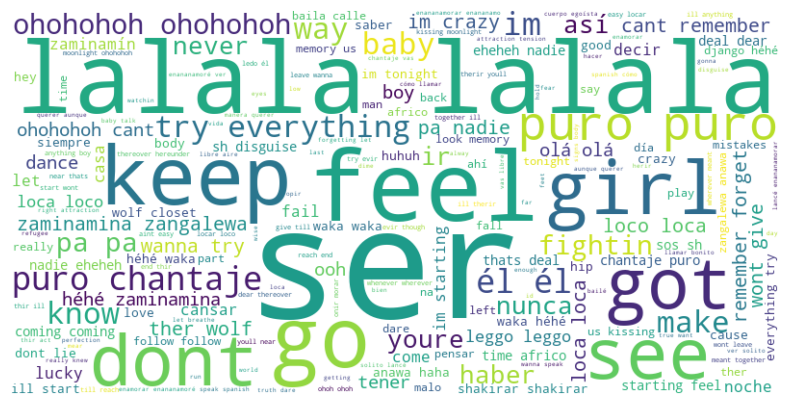

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

texto_total = " ".join([" ".join(letra) for letra in letras_limpias])
nube = WordCloud(width=800, height=400, background_color='white').generate(texto_total)

plt.figure(figsize=(10, 5))
plt.imshow(nube, interpolation='bilinear')
plt.axis("off")
plt.show()

### Gráficas de emociones

In [48]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Distribución de emociones - Español')

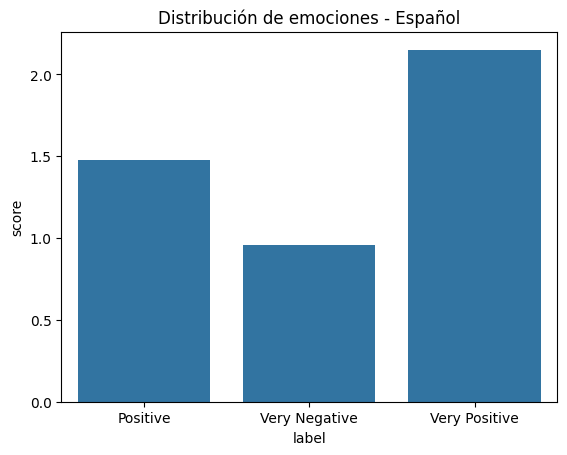

In [50]:
import pandas as pd
import seaborn as sns

df_emociones_es = pd.DataFrame(emociones_es)
conteo = df_emociones_es.groupby("label")["score"].sum().reset_index()
sns.barplot(data=conteo, x="label", y="score").set_title("Distribución de emociones - Español")

Text(0.5, 1.0, 'Distribución de emociones - Inglés')

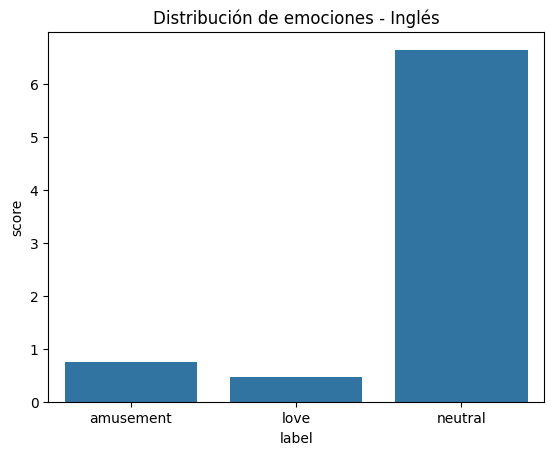

In [52]:
df_emociones_en = pd.DataFrame(emociones_en)
conteo = df_emociones_en.groupby("label")["score"].sum().reset_index()
sns.barplot(data=conteo, x="label", y="score").set_title("Distribución de emociones - Inglés")

In [65]:
# Asociar anios_canciones con letras_limpias, palabras, emociones_es, emociones_en
df_canciones_anios = pd.DataFrame({
    'anio': anios_canciones,
    'letra': [" ".join(letra) for letra in letras_limpias],
    'palabras': [", ".join(tema) for tema in temas_canciones],
    'emociones_es': [res['label'] for res in emociones_es],
    'emociones_en': [res['label'] for res in emociones_en]
})

# Mostrar los primeros 10 registros
print("\nPrimeros 10 registros de canciones con años:")
print(df_canciones_anios.head(10))


Primeros 10 registros de canciones con años:
   anio                                              letra  \
0  2006  ladi tonight fightin got refugees herir fighti...   
1  2010  ohhehh zangalewa zangalewa zangalewa zangalewa...   
2  2009  sos sh disguise sos sh disguise ther wolf disg...   
3  2016  bien alejar sentir solo siempre toy ahí ser gu...   
4  2014  left note bedpost saying repeat yesterdays mis...   
5  2001  lucky born far away could make fun distance lu...   
6  2016  messed tonight lost another fight still mess i...   
7  2014  essa bola vai rolar mundo é um tapete verde qu...   
8  2017  vida empezar cambiar noche conocí tener perder...   
9  2010  loca loca locar dance die loca loca sh playin ...   

                                    palabras   emociones_es emociones_en  
0         nadie, querer, chantaje, ser, puro  Very Positive      neutral  
1                day, far, got, feel, querer  Very Positive    amusement  
2       everything, ill, wont, try, ohohohoh  

In [66]:
# ORGANIZAR LOS REGISTROS DE MENOR A MAYOR AÑO
df_canciones_anios_organizado = df_canciones_anios.sort_values(by='anio')

# Mostrar los primeros 10 registros organizados
print("\nPrimeros 10 registros de canciones organizados por año:")
print(df_canciones_anios_organizado.head(10))


Primeros 10 registros de canciones organizados por año:
   anio                                              letra  \
5  2001  lucky born far away could make fun distance lu...   
0  2006  ladi tonight fightin got refugees herir fighti...   
2  2009  sos sh disguise sos sh disguise ther wolf disg...   
1  2010  ohhehh zangalewa zangalewa zangalewa zangalewa...   
9  2010  loca loca locar dance die loca loca sh playin ...   
7  2014  essa bola vai rolar mundo é um tapete verde qu...   
4  2014  left note bedpost saying repeat yesterdays mis...   
3  2016  bien alejar sentir solo siempre toy ahí ser gu...   
6  2016  messed tonight lost another fight still mess i...   
8  2017  vida empezar cambiar noche conocí tener perder...   

                                    palabras   emociones_es emociones_en  
5             like, leggo, feel, olá, lalala  Very Positive      neutral  
0         nadie, querer, chantaje, ser, puro  Very Positive      neutral  
2       everything, ill, wont, try,

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

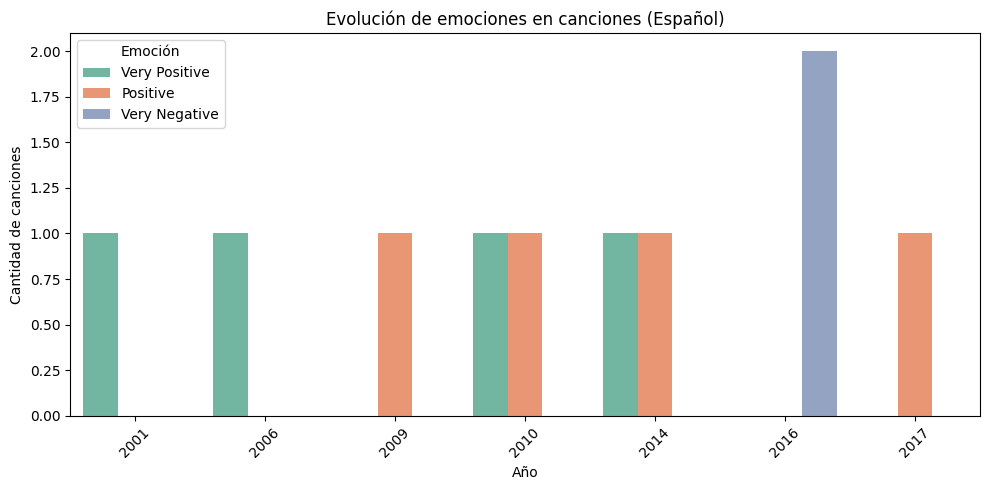

In [67]:
# Crear una gráfica de línea de emociones (español)
plt.figure(figsize=(10, 5))
sns.countplot(data=df_canciones_anios_organizado, x='anio', hue='emociones_es', palette='Set2')
plt.title('Evolución de emociones en canciones (Español)')
plt.ylabel('Cantidad de canciones')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.legend(title='Emoción')
plt.tight_layout()
plt.show()

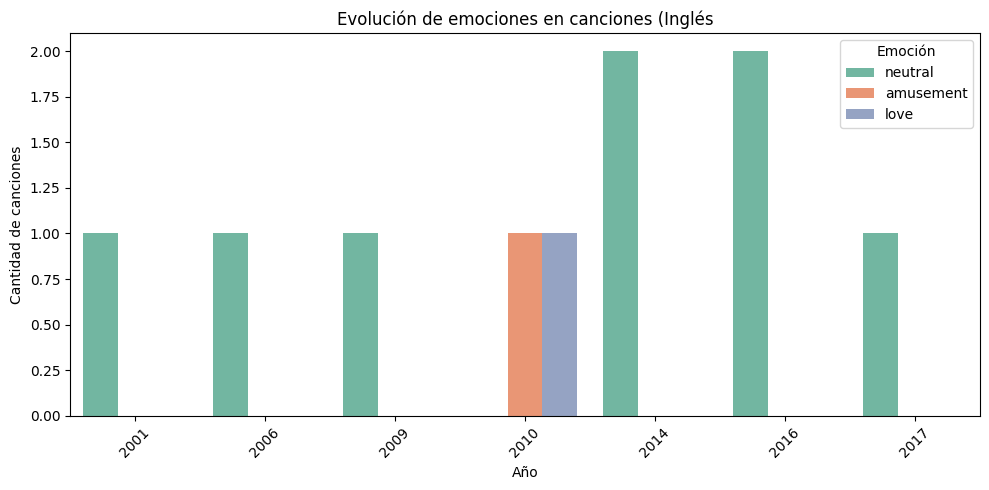

In [68]:
# Crear una gráfica de línea de emociones (inglés)
plt.figure(figsize=(10, 5))
sns.countplot(data=df_canciones_anios_organizado, x='anio', hue='emociones_en', palette='Set2')
plt.title('Evolución de emociones en canciones (Inglés')
plt.ylabel('Cantidad de canciones')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.legend(title='Emoción')
plt.tight_layout()
plt.show()

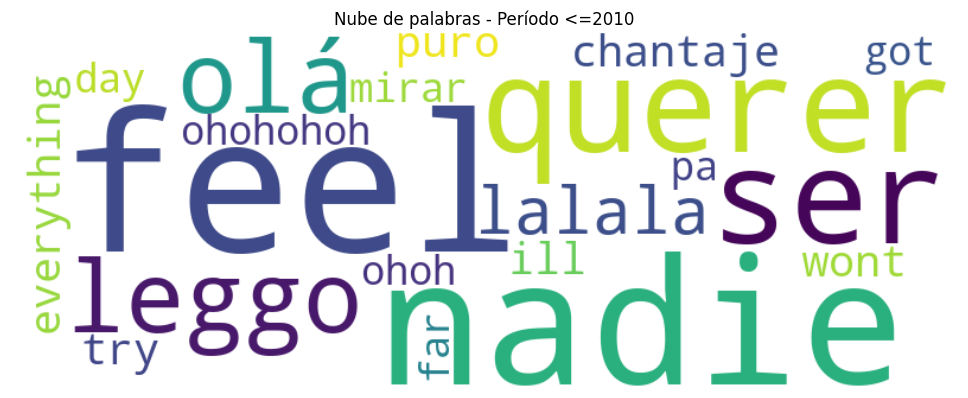

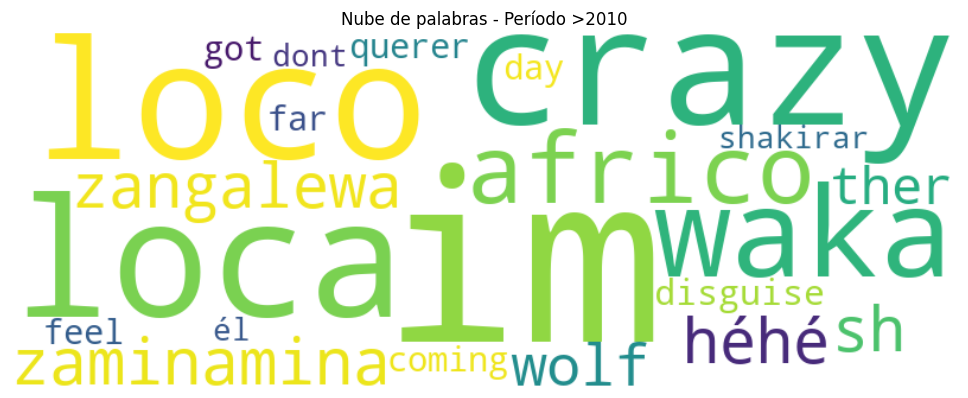

In [69]:
from wordcloud import WordCloud

# Concatenar palabras por periodo
periodo_1 = ", ".join(df_canciones_anios_organizado[df_canciones_anios_organizado['anio'] <= 2010]['palabras'])
periodo_2 = ", ".join(df_canciones_anios_organizado[df_canciones_anios_organizado['anio'] > 2010]['palabras'])

# Wordclouds
for i, (periodo, texto) in enumerate(zip(["<=2010", ">2010"], [periodo_1, periodo_2])):
    wc = WordCloud(width=800, height=300, background_color='white').generate(texto)
    plt.figure(figsize=(10, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nube de palabras - Período {periodo}")
    plt.tight_layout()
    plt.show()

## Insights

### ¿Qué tema predomina en su discografía?
A través del análisis semántico de las letras, se observa que el eje temático predominante gira en torno a las emociones y las relaciones sentimentales. Términos como feel, keep, don't, girl y go revelan una constante narrativa sobre el amor, el desamor, la lucha por mantener una conexión o dejarla ir, y el autoconocimiento en el proceso. Esto sugiere que la discografía explora intensamente experiencias emocionales humanas, un patrón común en artistas que buscan resonar con vivencias universales de su audiencia.

#### Detalle de la respuesta
El tema que predomina en la discografía analizada es el de las emociones, las relaciones personales (especialmente románticas), y la identidad.

- feel, ser, see → apuntan a introspección, percepción de uno mismo y emociones internas.

- girl, go, keep, don't → sugieren un discurso centrado en relaciones sentimentales, decisiones emocionales, y dinámicas de pareja (alejarse, permanecer, intentar cambiar...).

Esto coincide con la temática común en géneros como el pop, R&B o baladas, donde los artistas exploran su mundo interior y su conexión emocional con otros.

### ¿Cómo ha cambiado su estilo a lo largo del tiempo?
El estilo de Shakira ha transitado desde una narrativa emocional y personal en sus inicios, hacia una propuesta más global, rítmica y festiva en su etapa intermedia. A pesar de experimentar una fase más sombría en 2016, logra recuperar una energía positiva. Esta evolución evidencia su versatilidad como artista y su capacidad de adaptación sin perder su esencia creativa.

#### Detalle de la respuesta
A lo largo de su discografía, el estilo de Shakira ha mostrado una evolución clara tanto en su carga emocional como en sus temas líricos.

1. **Transición emocional:** de lo positivo a lo introspectivo
    En los primeros años (2001–2006), predominan emociones muy positivas, reflejando una etapa de energía optimista y temas como el amor, la esperanza y la autoafirmación.

    En 2010 y 2014, mantiene ese tono positivo, pero lo mezcla con expresiones más festivas (waka, olé, lalala), lo que sugiere una apertura hacia sonidos más globales y celebratorios.

    Sin embargo, en 2016 se percibe un cambio notorio con emociones muy negativas, marcando una etapa de introspección, conflictos personales o desilusión.

    En 2017 vuelve a una emoción positiva, lo cual podría interpretarse como una especie de cierre o redención emocional.

2. **Evolución temática y lírica**
    En el periodo <= 2010, las palabras clave como feel, querer, ser y nadie apuntan a una exploración de la identidad personal y emocional. Aunque introspectiva, esta etapa se expresa desde la sensibilidad y la conexión afectiva.

    En el periodo > 2010, surgen términos como loco, loca, waka, africo, crazy e I'm, lo que indica una etapa mucho más explosiva, multicultural y corporal, centrada en el baile, la celebración, la performance y la presencia escénica.

3. **Influencias globales y multilingüismo**
    La presencia de términos en inglés (feel, crazy, I'm), portugués (olá), e incluso africanos (waka, zaminamina) refleja un viraje hacia lo internacional y multicultural, incorporando ritmos y expresiones de distintas culturas.

### ¿Cuáles son las palabras más únicas o distintivas de Shakira?
Las palabras más distintivas de Shakira son ser, feel, querer, loco, waka; lo cual revela su evolución desde una artista íntima y romántica hacia una figura global que mezcla culturas, idiomas y emociones con autenticidad. Estas palabras no solo marcan su estilo, sino que la posicionan como una artista híbrida, camaleónica y con un sello propio inconfundible.

| Tipo de palabra                                       | Características                                                                                      |
| ----------------------------------------------------- | ---------------------------------------------------------------------------------------------------- |
| Verbos como *ser*, *go*, *feel*, *see*                | Refuerzan su estilo introspectivo y narrativo                                                        |
| Palabras en español e inglés                          | Reflejan su identidad **bilingüe** y su alcance global                                               |
| Palabras culturalmente cargadas como *waka*, *africo* | Muestran su **fusión con ritmos internacionales** y su participación en eventos como la Copa Mundial |
| Palabras emocionales como *crazy*, *loco*             | Subrayan su energía escénica y su **transformación hacia un pop más dinámico**                       |
